<a href="https://colab.research.google.com/github/szalontai/PUC_Rio_MVP_sprint_04/blob/develop/MVP_sprint_04_em_POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## MVP - Sprint 4:

O dataset escolhido é um que contém as medidas de peso, altura e idade como classe de entrada e como saida o tamanho do cliente (
XXS, S, M, L, XL, XXl e XXXL).


O datase pode ser localizado no endereço: https://www.kaggle.com/datasets/tourist55/clothessizeprediction                                      


Como trabalho em uma empresa que desenvolve software para a aréa de confecção, achei interessante analisar esse dataset e gostaria de usá-lo futuramente na empresa.

Esse notebook eu montei usando classes.

In [ ]:
# Atualização do scikit-learn para a última versão, pois a que o Google Colab não está.
# Por favor, dê um restart na sessão para que a atualização seja finalizada
#!pip install --upgrade scikit-learn


In [1]:
# @title Carga das bibliotecas

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



## Carga do Dataset

## Aqui eu faço a carga de todos os dataset apenas para demonstrar as quantidades usadas

In [29]:
# @title Demostrativo da base Original

# Informa a URL de importação do dataset
url_original = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_Original.csv'

# Lê o arquivo
dataset = pd.read_csv(url_original, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()

,weight,age,height,size
147233,65,34.0,167.19,XL
147234,65,34.0,167.19,XL
147235,65,34.0,167.19,XL
147236,65,34.0,167.19,XL
147237,65,34.0,167.19,XL


In [30]:
# @title Demostrativo da base Golden, com 20% da original.

# Informa a URL de importação do dataset
url_golden = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_Golden.csv'

# Lê o arquivo
dataset = pd.read_csv(url_golden, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()


,weight,age,height,size
29442,58,43.0,172.72,M
29443,65,30.0,170.18,M
29444,62,28.0,162.56,M
29445,48,30.0,165.10,XXS
29446,79,38.0,160.02,XXXL


In [31]:
# @title Demostrativo da base teste, com 80% da original e carga

# Informa a URL de importação do dataset
url = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_80.csv'

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

# Carga
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Mostra as últimas linhas do dataset
df.tail()


Saída esperada: ['XL' 'XL' 'M' 'S' 'XXS' 'XXXL' 'L' 'XXL' 'M' 'S']
Saída LR      : saida_LR


## Montagem do POO

Criação e avaliação de modelos: linha base

KNN: 0.489568 (0.003601)
CART: 0.488203 (0.007653)
NB: 0.506378 (0.011196)
LR: 0.467725 (0.007468)



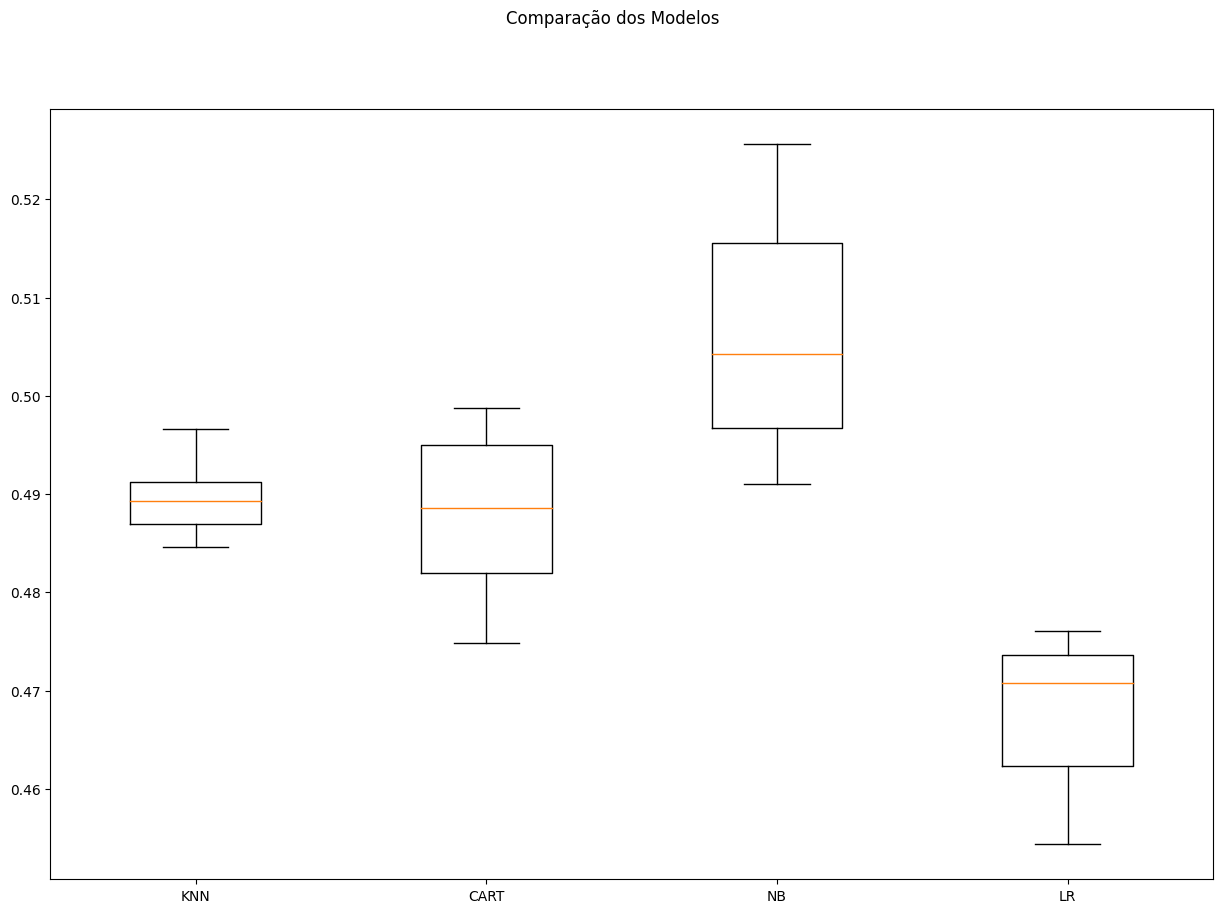


Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.490 (0.004)
CART-orig: 0.488 (0.008)
NB-orig: 0.506 (0.011)
LR-orig: 0.468 (0.007)
KNN-padr: 0.490 (0.009)
CART-padr: 0.488 (0.007)
NB-padr: 0.506 (0.011)
LR-padr: 0.480 (0.006)
KNN-norm: 0.492 (0.007)
CART-norm: 0.488 (0.008)
NB-norm: 0.506 (0.011)
LR-norm: 0.465 (0.007)



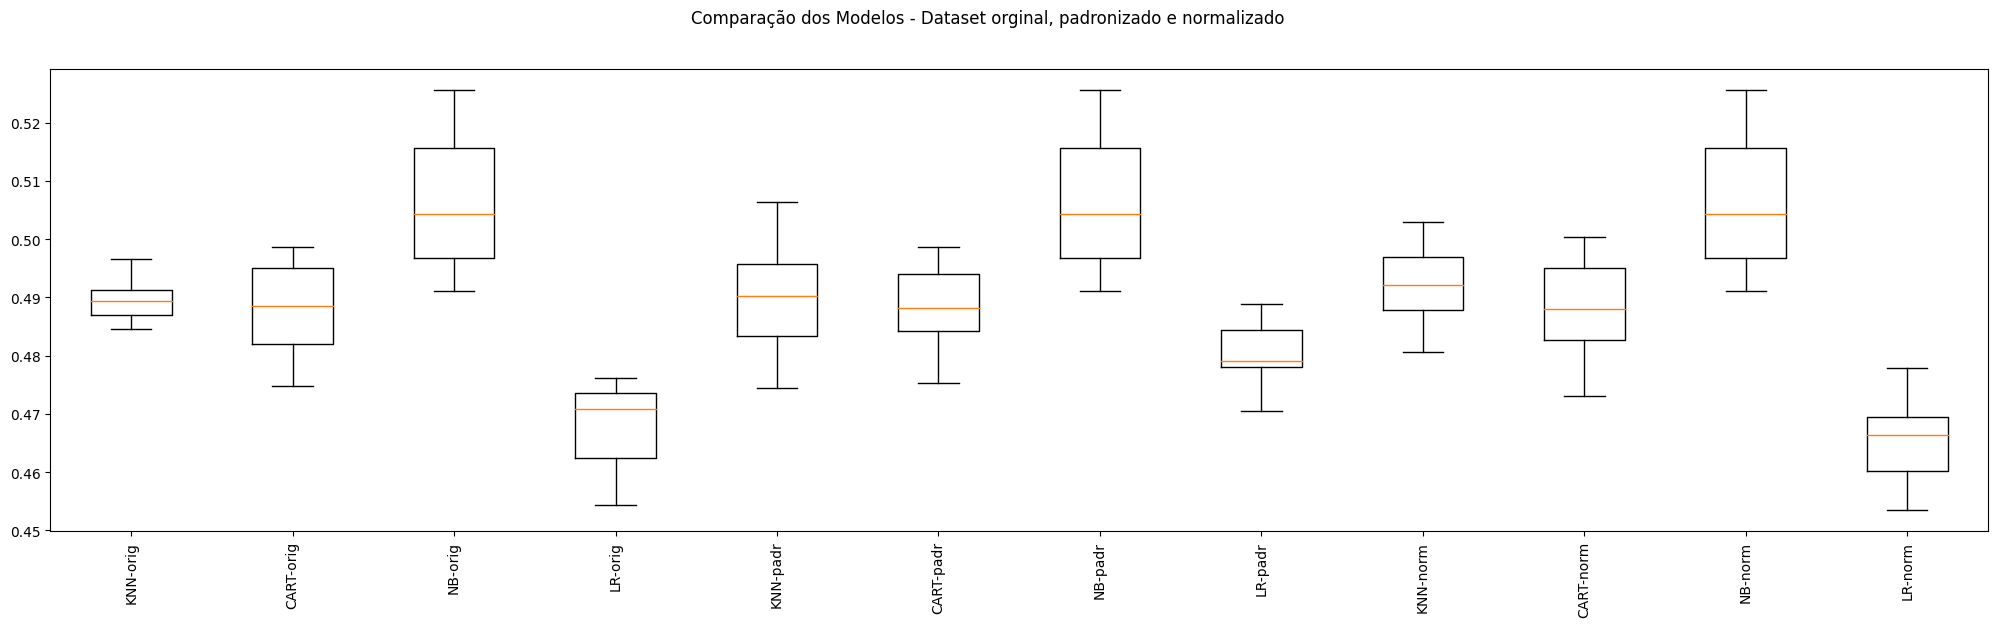


Análise dos resultados

Apesar do CART apresentar o maior percentual entre os algoritmos,
ele também apresenta alguns pontos fora.
O algorítimo KNN e LogisticRegression apresentaram os melhores resultados.
Por isso escolhi os dois para fazer a otimização dos hiporparâmetros.

Otimização dos hiperparâmetros


Tuning do LogisticRegression.

Sem tratamento de missings: LR-orig - Melhor: 0.477410 usando {'LR__C': 100, 'LR__max_iter': 500, 'LR__random_state': 42}
Sem tratamento de missings: LR-padr - Melhor: 0.480353 usando {'LR__C': 10, 'LR__max_iter': 100, 'LR__random_state': 42}
Sem tratamento de missings: LR-norm - Melhor: 0.481462 usando {'LR__C': 1000, 'LR__max_iter': 100, 'LR__random_state': 42}

O melhor valor para LR foi

Nome: LR-norm
Valor: 0.4814620633096333

Parâmetros:
C: 1000
max_iter: 100
random_state: 42


Tuning do KNN.

Sem tratamento de missings: KNN-orig - Melhor: 0.527539 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Sem tratamento de missings: KNN-padr 

In [28]:

class Carregador:

    def carregar_dados(self, url: str):
        """ Carrega e retorna um DataFrame. Há diversos parâmetros
        no read_csv que poderiam ser utilizados para dar opções
        adicionais.
        """
        return pd.read_csv(url,delimiter=',')



class PreProcessador:

    def pre_processar(self, X,Y, percentual_teste, seed=7):
        """ Cuida de todo o pré-processamento. """
        # limpeza dos dados e eliminação de outliers

        # feature selection

        # divisão em treino e teste
        X_train, X_test, Y_train, Y_test = self.__preparar_holdout(X,Y,
                                                                  percentual_teste,
                                                                  seed)
        # normalização/padronização

        return (X_train, X_test, Y_train, Y_test)

    def __preparar_holdout(self, X,Y, percentual_teste, seed):
        """ Divide os dados em treino e teste usando o método holdout.
        Assume que a variável target está na última coluna.
        O parâmetro test_size é o percentual de dados de teste.
        """

        return train_test_split(X, Y, test_size=percentual_teste, shuffle=True,
                                random_state=seed,stratify=Y)

class Modelador:

    def criar_linha_base(self, X_train, Y_train,cv,scoring,seed=7):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """
        np.random.seed(seed) # definindo uma semente global

        # Lista que armazenará os modelos
        models = []

        # Criando os modelos e adicionando-os na lista de modelos
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART', DecisionTreeClassifier()))
        models.append(('NB', GaussianNB()))
        models.append(('LR', LogisticRegression()))

        # Listas para armazenar os resultados
        results = []
        names = []

        # Avaliação dos modelos
        for name, model in models:
            cv_results = cross_val_score(model, X_train, Y_train, cv=cv, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)

        print('')
        # Boxplot de comparação dos modelos
        fig = plt.figure(figsize=(15,10))
        fig.suptitle('Comparação dos Modelos')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

    def padronizar(self, X_train, Y_train,cv,scoring,seed=7):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """
        np.random.seed(seed) # definindo uma semente global para este bloco

        # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
        pipelines = []
        results = []
        names = []

        # Criando os elementos do pipeline

        # Algoritmos que serão utilizados
        knn = ('KNN', KNeighborsClassifier())
        cart = ('CART', DecisionTreeClassifier())
        naive_bayes = ('NB', GaussianNB())
        lr = ('LR', LogisticRegression())

        # Transformações que serão utilizadas
        standard_scaler = ('StandardScaler', StandardScaler())
        min_max_scaler = ('MinMaxScaler', MinMaxScaler())

        # Montando os pipelines

        # Dataset original
        pipelines.append(('KNN-orig', Pipeline([knn])))
        pipelines.append(('CART-orig', Pipeline([cart])))
        pipelines.append(('NB-orig', Pipeline([naive_bayes])))
        pipelines.append(('LR-orig', Pipeline([lr])))

        # Dataset Padronizado
        pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
        pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
        pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
        pipelines.append(('LR-padr', Pipeline([standard_scaler, lr])))

        # Dataset Normalizado
        pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
        pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
        pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
        pipelines.append(('LR-norm', Pipeline([min_max_scaler, lr])))

        # Executando os pipelines
        for name, model in pipelines:
            cv_results = cross_val_score(model, X_train, Y_train, cv=cv, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
            print(msg)

        print('')

        # Boxplot de comparação dos modelos
        fig = plt.figure(figsize=(25,6))
        fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names, rotation=90)
        plt.show()

class Otimizador:

    def tunar(self,X_train, Y_train,componente_nome, componente,param_grid,cv,scoring,seed=7):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """

        np.random.seed(seed) # definindo uma semente global para este bloco

        pipelines = []

        # Definindo os componentes do pipeline
        lr = ('LR', LogisticRegression())

        standard_scaler = ('StandardScaler', StandardScaler())
        min_max_scaler = ('MinMaxScaler', MinMaxScaler())

        # Dataset original
        pipelines.append((componente_nome+'-orig', Pipeline([componente])))

        # Dataset Padronizado
        pipelines.append((componente_nome+'-padr', Pipeline([standard_scaler, componente])))

        # Dataset Normalizado
        pipelines.append((componente_nome+'-norm', Pipeline([min_max_scaler, componente])))

        best_score = 0

        # Prepara e executa o GridSearchCV
        for name, model in pipelines:
            grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)
            grid.fit(X_train, Y_train)
            if grid.best_score_>best_score:
              best_score=grid.best_score_
              best_name = name
              best_params = grid.best_params_
            # imprime a melhor configuração
            print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

        return best_name,best_score,best_params
class Modelo:

    def treinar(self, X_train, Y_train,modelador,scaler):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """

        #scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
        rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

        # Escolha dos melhores parâmetros para LR e KNN
        modelo = modelador

        modelo.fit(rescaledX, Y_train)
        return modelo


    def treinar_KNN(self, X_train, Y_train):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """

        scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
        rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

        # Escolha dos melhores parâmetros para LR e KNN
        modelo = KNeighborsClassifier(metric='manhattan', n_neighbors=21)

        modelo.fit(rescaledX, Y_train)


        return modelo

    def treinar_LR(self, X_train, Y_train):
        """ Cria e treina um modelo SVM. Poderia ter um Grid Search
        com cross_validation para escolher os melhores hiperparâmetros, etc.
        """

        scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
        rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino


        # Preparação do modelo
      #  modelo = LogisticRegression(C=1000, random_state=42, max_iter=100) ##Acurácia: 0.5537957789087803
        modelo = LogisticRegression(C=100, random_state=42, max_iter=100) ##Acurácia: 0.5537957789087803
        modelo.fit(rescaledX, Y_train)
        return modelo


class Avaliador:

    def avaliar_acuracia_scaler(self, modelo,X_train,y_train, X_test, Y_test,scaler):
        """ Faz uma predição e avalia o modelo. Poderia parametrizar o tipo de
        avaliação, entre outros.
        """

        # Preparação do modelo
        #scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
        #rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

        #modelo.fit(rescaledX, y_train)

        # Estimativa da acurácia no conjunto de teste
        rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
        predicoes = modelo.predict(rescaledTestX)
        accuracy = accuracy_score(Y_test, predicoes)
        report = classification_report(Y_test, predicoes)

        # Imprimir resultados
        print("Predição:", predicoes)
        print("Acurácia:", accuracy)
        print("\nRelatório de Classificação:")
        print(report)

class Simulador:

    def simulador(self, data,atributos,tamanho_array,modelo,scaler):
        """ Faz uma predição e avalia o modelo. Poderia parametrizar o tipo de
        avaliação, entre outros.
        """

        entrada = pd.DataFrame(data, columns=atributos)

        array_entrada = entrada.values

        indice_slice = slice(*map(int, tamanho_array.split(':')))

        X_entrada = array_entrada[:,indice_slice].astype(float)

        # Padronização nos dados de entrada usando o scaler utilizado em X
        rescaledEntradaX = scaler.transform(X_entrada)

        # Predição de classes dos dados de entrada
        saidas = modelo.predict(rescaledEntradaX)
        return saidas

class Gerador:

    def gerador_pickle(self, modelo, nome):
        """ Gera o arquivo pickle baseado no modelo com o nome passado.
        """

        artifact_pkl_filename = nome+'.pkl'

        local_path = artifact_pkl_filename
        with open(local_path, 'wb') as model_file:
          pickle.dump(modelo, model_file)

    def gerador_joblib(self, modelo, nome):
        """ Gera o arquivo joblib baseado no modelo com o nome passado.
        """

        artifact_joblib_filename = nome+'.joblib'

        local_path = artifact_joblib_filename
        joblib.dump(modelo, local_path)


# Este código começaria daqui, logo após os imports
# from carregador import Carregadpr
# from preprocessador import PreProcessador
# from modelo import Modelo
# from avaliador import Avaliador

# Instanciação das Classes
carregador = Carregador()
pre_processador = PreProcessador()
modelador = Modelador()
otimizador = Otimizador()
modelo = Modelo()
avaliador = Avaliador()
simulador = Simulador()
gerador = Gerador()

# Parâmetros

url_dados = ('https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_80.csv')
# Informa a URL de importação do dataset
url_dados = 'https://raw.githubusercontent.com/szalontai/PUC_Rio_MVP_sprint_04/develop/Base_Teste_Golden.csv'


atributos = ['vazio','weight', 'age','height', 'size']
percentual_teste = 0.2
seed = 7

# Código

# Carga
dataset = carregador.carregar_dados(url_dados)
ds = dataset[["weight","age","height","size"]]

# Retirando os campos em branco
df = ds.dropna(how='any')

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:3]
y = array[:,3]

# Pré-processamento.
# Separação em conjunto de treino e conjunto de teste com holdout
X_train, X_test, Y_train, Y_test = pre_processador.pre_processar(X,y , percentual_teste,seed )

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)


# Criação e avaliação de modelos: linha base
print('Criação e avaliação de modelos: linha base')
print('')
modelador.criar_linha_base(X_train,Y_train,kfold,scoring,seed)
print('')

# Criação e avaliação de modelos: dados padronizados e normalizados
print('Criação e avaliação de modelos: dados padronizados e normalizados')
print('')
modelador.padronizar(X_train,Y_train,kfold,scoring,seed)

print('')

#Análise dos resultados
print('Análise dos resultados')
print('')

print('Apesar do CART apresentar o maior percentual entre os algoritmos,')
print('ele também apresenta alguns pontos fora.')

print('O algorítimo KNN e LogisticRegression apresentaram os melhores resultados.')
print('Por isso escolhi os dois para fazer a otimização dos hiporparâmetros.')
print('')


# Otimização dos hiperparâmetros
print('Otimização dos hiperparâmetros')
print('')

# Tuning do LogisticRegression. Esse processo leva 1h10m.
print('')
print('Tuning do LogisticRegression.')
print('')

lr = ('LR', LogisticRegression())
param_grid = {
    'LR__C': [1, 10, 100, 1000],
    'LR__random_state': [42],
    'LR__max_iter': [100, 200, 500, 1000]
}

best_name_LR,best_score_LR,best_params_LR = otimizador.tunar(X_train,Y_train,'LR',lr,param_grid,kfold,scoring,seed)
print('')
print('O melhor valor para LR foi')
print('')
print("Nome:", best_name_LR)
print("Valor:", best_score_LR)
print('')


best_params_LR = [best_params_LR]
valor_C = list(best_params_LR[0].values())[0]
valor_max_iter = list(best_params_LR[0].values())[1]
valor_random_state = list(best_params_LR[0].values())[2]

print("Parâmetros:")
print("C:",valor_C)
print("max_iter:",valor_max_iter)
print("random_state:",valor_random_state)

print('')

# Tuning do KNN. Esse processo leva 21m.
print('')
print('Tuning do KNN.')
print('')

knn = ('KNN', KNeighborsClassifier())
param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

best_name_KNN,best_score_KNN,best_params_KNN = otimizador.tunar(X_train,Y_train,'KNN',knn,param_grid,kfold,scoring,seed)

print('')
print('O melhor valor para KNN foi')
print('')
print("Nome:", best_name_KNN)
print("Valor:", best_score_KNN)
print('')


best_params_KNN = [best_params_KNN]
valor_metric = list(best_params_KNN[0].values())[0]
valor_neighbors = list(best_params_KNN[0].values())[1]

print("Parâmetros:")
print("metric:",valor_metric)
print("neighbors:",valor_neighbors)
print('')

# Finalização do Modelo

# Preparação do modelo
print('')
print('Preparação do modelo')
print('')

# Escolha do melhor parâmetro

# Escolha do melhores parâmetro para LR
print('Escolha do melhor parâmetro para LR')
print('')
pre_modelo_LR = LogisticRegression(C=valor_C, random_state=valor_random_state, max_iter=valor_max_iter)
scaler_LR = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
modelo_LR = modelo.treinar(X_train, Y_train,pre_modelo_LR,scaler_LR)
print('')

# Avaliação do modelo com o conjunto de testes
# Estimativa da acurácia no conjunto de teste para o modelo LR
avaliador.avaliar_acuracia_scaler(modelo_LR,X_train,Y_train, X_test, Y_test,scaler_LR)
print('')

# Escolha do melhores parâmetro para KNN
print('Escolha do melhor parâmetro para KNN')
print('')
pre_modelo_KNN = KNeighborsClassifier(metric=valor_metric, n_neighbors=valor_neighbors)
scaler_KNN = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
modelo_KNN = modelo.treinar(X_train, Y_train,pre_modelo_KNN,scaler_KNN)
print('')

# Avaliação do modelo com o conjunto de testes
# Estimativa da acurácia no conjunto de teste para o modelo KNN
avaliador.avaliar_acuracia_scaler(modelo_KNN,X_train,Y_train, X_test, Y_test,scaler_KNN)
print('')



# Preparação do modelo com TODO o dataset para o LR
scaler_LR = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler_LR.transform(X) # aplicação da padronização com TODO o dataset
modelo_LR.fit(rescaledX, y)
print('')


# Preparação do modelo com TODO o dataset para o KNN
scaler_KNN = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler_KNN.transform(X) # aplicação da padronização com TODO o dataset
modelo_KNN.fit(rescaledX, y)
print('')

print('')

#Considerações finais
print('Considerações finais.')
print('')
print('O algorítimo KNN apresentou um valor melhor em relação ao LogisticRegression.')
print('')
print('KNN = 61,52%')
print('LogisticRegression = 59,57%')
print('Por isso o modelo escolhido para dar continuidade no meu projeto do MVP, foi o KNN.')
print('')



# Simulando a aplicação do modelo em dados não vistos
data = {       ##   XL      XL      M       S       XXS     XXXL    L       XXL     M       S
        'weight':  [70,     74,     61,     45,     49,     76,     61,     65,     58,     52] ,
        'age':     [30,     31,     31,     29,     32,     30,     35.0,   34.0,   34.0,   27.0],
        'height':  [167.64, 167.64, 172.72, 154.94, 160.02, 167.64, 162.56, 160.02, 165.1,  160.02],
        }


atributos = ['weight', 'age', 'height']
tamanho_array = '0:8'
scaler_simulador = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
saida_LR = simulador.simulador(data,atributos,tamanho_array,modelo_LR,scaler_simulador)
saida_KNN = simulador.simulador(data,atributos,tamanho_array,modelo_KNN,scaler_simulador)

print('')
print('Simulando a aplicação dos modelos em dados não vistos')
print('')

print('Simulando a aplicação do modelo LR')
print('')
print("Saída esperada: ['XL' 'XL' 'M' 'S' 'XXS' 'XXXL' 'L' 'XXL' 'M' 'S']")
print('Saída LR      :',saida_LR)
print('')

print('Simulando a aplicação do modelo KNN')
print('')
print("Saída esperada: ['XL' 'XL' 'M' 'S' 'XXS' 'XXXL' 'L' 'XXL' 'M' 'S']")
print('Saída KNN     :',saida_KNN)

print('')


# Impressão do resultado da avaliação


# Foram gerados os dois modelos para validar no teste unitário

print('Geração os dois modelos para validar no teste unitário')
print('')

print('Modelo e scaler para o LR')
gerador.gerador_pickle(modelo_LR,"grade_lr")
gerador.gerador_pickle(scaler_LR,"scaler_lr")
print('')

print('Modelo e scaler para o KNN')
gerador.gerador_pickle(modelo_KNN,"grade_knn")
gerador.gerador_pickle(scaler_KNN,"scaler_knn")
print('')
